### Clean Data ke Corpus

In [4]:
df = pd.read_csv('cleaned_kp.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# from gensim.model import CoherenceModel

In [6]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return final

In [7]:
# df['full_text'] = df['full_text'].astype(str)

In [8]:
# search df['full_text'] with float
df.dropna(subset=['full_text'], inplace=True)


In [9]:
texts = gen_words(df['full_text'])

In [10]:
print(texts)

[['by', 'lewat'], ['kakanwil', 'kemenag', 'provinsi', 'papua', 'pdt', 'amsal', 'yowei', 'sampai', 'materi', 'menteri', 'agama', 'bidang', 'agama', 'materi', 'sampai', 'giat', 'selenggara', 'bidang', 'agama', 'kristen', 'kanwil', 'kemenag', 'papua', 'kamis', 'jb'], ['politik', 'baik', 'anggota', 'dprd', 'betul', 'psi', 'libat', 'rakyat', 'proses', 'buat'], ['politik', 'baik', 'anggota', 'dprd', 'betul', 'psi', 'libat', 'rakyat', 'proses', 'buat'], ['kerja', 'institusi', 'izin', 'alami', 'baru', 'masuk', 'temu', 'bicara', 'orang', 'dr', 'tamas', 'prof', 'fuhr', 'bicara', 'kena', 'kriminologi', 'publik', 'governansi', 'sama', 'dr', 'tamas', 'buat', 'kuliah'], ['ajar', 'publik'], ['penting', 'aspekaspek', 'publik'], ['mun', 'memang', 'macett', 'ttos', 'ngaganggu', 'pis', 'naha', 'sih', 'teu', 'demo', 'demo', 'teh', 'kanu', 'urus', 'sapopoe', 'heula', 'biaya', 'macet', 'skala', 'kota', 'heula', 'teu', 'kudu', 'nasional', 'iyeu', 'mah', 'raa', 'ruu', 'nu', 'nyieun', 'lamtas', 'mah', 'hees', 

In [11]:
id2word = corpora.Dictionary(texts)

corpus = []
for text in texts:
  new = id2word.doc2bow(text)
  corpus.append(new)

In [12]:
print(corpus)

[[(0, 1), (1, 1)], [(2, 3), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(23, 1), (30, 1), (31, 1), (32, 2), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1)], [(45, 1), (49, 1)], [(45, 1), (50, 1), (51, 1)], [(52, 1), (53, 3), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1)], [(81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(13, 1), (23, 1), (31, 1), (93, 1), 

### LDA Visualization

In [13]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=15,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            alpha='auto'
                                            )

In [14]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=2)
vis

c:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.520364  0.031462       1        1  34.104987
14     0.064965 -0.443407       2        1   7.964909
7     -0.387072 -0.266496       3        1   7.319595
1     -0.206735  0.400644       4        1   7.007344
12     0.243823 -0.314042       5        1   6.633218
8      0.317962 -0.134839       6        1   5.810742
6      0.045442  0.420369       7        1   5.671563
0     -0.161962 -0.359501       8        1   4.896034
13    -0.378004  0.162844       9        1   3.950136
9      0.174044  0.287263      10        1   3.883654
11     0.296910  0.178303      11        1   3.122353
4     -0.001267  0.046011      12        1   3.041417
3     -0.348258 -0.042331      13        1   2.802987
2     -0.154461  0.158061      14        1   2.036818
5     -0.025752 -0.124341      15        1   1.754245, topic_info=               Term         Freq        Total Category  logprob  loglift
174         sekolah  1994.000000  1994.000000  Default  30.0000  30.0000
1367         ganjar  2114.000000  2114.000000  Default  29.0000  29.0000
29           rakyat  1666.000000  1666.000000  Default  28.0000  28.0000
256         tingkat  1285.000000  1285.000000  Default  27.0000  27.0000
187      masyarakat   897.000000   897.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
10191  ganjarmahfud     0.073202   391.120750  Topic15 -10.4352  -4.5404
10066  visisubianto     0.072847   128.419690  Topic15 -10.4400  -3.4316
810           ingin     0.072512   334.416246  Topic15 -10.4447  -4.3933
1298         sempat     0.072511   199.501933  Topic15 -10.4447  -3.8767
9890         mantab     0.072252   167.234310  Topic15 -10.4482  -3.7039

[548 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
194       11  0.986483           ada
2          3  0.005210         agama
2          5  0.992412         agama
382        9  0.987569          ahli
49         1  0.985194          ajar
...      ...       ...           ...
10066     10  0.334840  visisubianto
1331       5  0.993498        vokasi
696        6  0.996092         wajib
1321       4  0.974456         wakil
531        2  0.994133         wujud

[501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 15, 8, 2, 13, 9, 7, 1, 14, 10, 12, 5, 4, 3, 6])

### Dynamic LDA Modelling

In [15]:
df['created_at'] = pd.to_datetime(df['created_at'])

<Axes: >

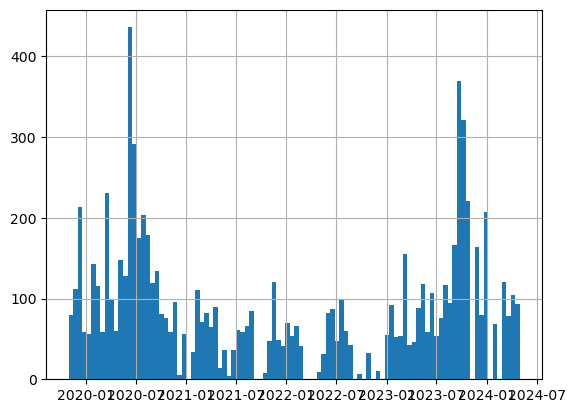

In [16]:
# visualize how much data with created_at as timestamps
df['created_at'].hist(bins=100)


In [30]:
# show year 2020 and month < 4
len(df.loc[(df['created_at'].dt.year == 2020) & (df['created_at'].dt.month < 4)])

662

In [33]:
# pick the data with year 2019
num_19 = len(df[df['created_at'].dt.year == 2019])

def slice_num_data(year):
    num = []
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month < 4)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 3) & (df['created_at'].dt.month < 7)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 6) & (df['created_at'].dt.month < 10)]))
    num.append(len(df.loc[(df['created_at'].dt.year == year) & (df['created_at'].dt.month > 9)]))
    return num

In [53]:
# make splitted data for 2019 - 2024
num_20 = slice_num_data(2020)
num_21 = slice_num_data(2021)
num_22 = slice_num_data(2022)
num_23 = slice_num_data(2023)
num_24 = slice_num_data(2024)
# make a list of data
num_data = [num_19]
num_data = num_data + num_20 + num_21 + num_22 + num_23 + num_24
num_data.remove(0)
num_data.remove(0)
print(num_data)

[441, 662, 1095, 861, 356, 322, 220, 270, 274, 223, 231, 235, 74, 418, 446, 849, 992, 281, 184]


In [55]:
ldaseq = gensim.models.ldaseqmodel.LdaSeqModel(corpus=corpus,
                                 id2word=id2word,
                                 time_slice=num_data,
                                 num_topics=10)

c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)
c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\

# Dynamic LDA Details

In [56]:
ldaseq.print_topics(time=0)

[[('sekolah', 0.06313217041873888),
  ('kuat', 0.05440565527983861),
  ('jawa', 0.04381352602657022),
  ('tingkat', 0.034927417813540175),
  ('gubernur', 0.03125847131350302),
  ('timur', 0.030175658615254484),
  ('seluruh', 0.026436188989791054),
  ('baik', 0.02309742476062902),
  ('nih', 0.018574192504243196),
  ('lebih', 0.016207951641108102),
  ('masuk', 0.016039669579001256),
  ('visi', 0.01566002191137957),
  ('semangat', 0.015192911251347276),
  ('pagi', 0.013984620613465606),
  ('kualitas', 0.013775770281215632),
  ('sistem', 0.013755405379679524),
  ('jam', 0.013658061814448345),
  ('tarik', 0.013389079912059473),
  ('semua', 0.013302426800367056),
  ('buat', 0.01223422950925145)],
 [('buat', 0.0151714679638097),
  ('enggak', 0.014470119313754522),
  ('guru', 0.013790648201150304),
  ('jadi', 0.013376110576919727),
  ('sama', 0.011299752602615308),
  ('apa', 0.010510785663191082),
  ('mau', 0.009020700716082821),
  ('banyak', 0.007833265267069721),
  ('orang', 0.00643527120952

In [57]:
ldaseq.print_topic_times(topic=0) # evolution of 1st topic

[[('sekolah', 0.06313217041873888),
  ('kuat', 0.05440565527983861),
  ('jawa', 0.04381352602657022),
  ('tingkat', 0.034927417813540175),
  ('gubernur', 0.03125847131350302),
  ('timur', 0.030175658615254484),
  ('seluruh', 0.026436188989791054),
  ('baik', 0.02309742476062902),
  ('nih', 0.018574192504243196),
  ('lebih', 0.016207951641108102),
  ('masuk', 0.016039669579001256),
  ('visi', 0.01566002191137957),
  ('semangat', 0.015192911251347276),
  ('pagi', 0.013984620613465606),
  ('kualitas', 0.013775770281215632),
  ('sistem', 0.013755405379679524),
  ('jam', 0.013658061814448345),
  ('tarik', 0.013389079912059473),
  ('semua', 0.013302426800367056),
  ('buat', 0.01223422950925145)],
 [('sekolah', 0.06388916817811888),
  ('kuat', 0.054954067699435095),
  ('jawa', 0.04325409993694369),
  ('tingkat', 0.035060652864511835),
  ('gubernur', 0.031008212443389818),
  ('timur', 0.03047896424771841),
  ('seluruh', 0.026551249752952366),
  ('baik', 0.02316308753486283),
  ('nih', 0.018738

In [92]:
ldaseq.save("model_seq")

In [ ]:
ldaseq = gensim.models.ldaseqmodel.LdaSeqModel.load("modelseq.model")

In [65]:
# to check Document - Topic proportions, use `doc-topics`
words = [id2word[word_id] for word_id, count in corpus[558]]
print (words)

['tinggi', 'bagus']


In [66]:
doc = ldaseq.doc_topics(558) # check the 558th document in the corpuses topic distribution
print (doc)

[0.0047619  0.95714286 0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619 ]


# DLDA Chain

In [68]:
ldaseq_chain = gensim.models.ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=id2word, time_slice=num_data, num_topics=5, chain_variance=0.05)

c:\Users\user\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))


KeyboardInterrupt: 

# DLDA Vis

In [14]:
!pip install gensim

In [4]:
import gensim

'gensim' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
from gensim.models.wrappers import DtmModel
# from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis

# dtm_path = "D:\Dafa\Jupyter\gemasyik\dtm-win64.exe"
# dtm_model = DtmModel(dtm_path, corpus, num_data, num_topics=15, id2word=id2word, initialize_lda=True)
# dtm_model.save('dtm_news')

# if we've saved before simply load the model
# dtm_model = DtmModel.load('dtm_news')

ImportError: cannot import name 'triu' from 'scipy.linalg.special_matrices' (c:\Users\user\anaconda3\envs\tfgpu\lib\site-packages\scipy\linalg\special_matrices.py)

In [1]:
!python --version

Python 3.9.19


In [1]:
dtm_model = DtmModel.load('dtm_model')

NameError: name 'DtmModel' is not defined

In [97]:
dtm_model.save('dtm_model')

In [100]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = dtm_model.dtm_vis(time=9, corpus=corpus)
vis_wrapper = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_wrapper)

In [1]:
pip install --use-pep517 gensim==3.8.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
from gensim.models.coherencemodel import CoherenceModel
import pickle

# we just have to specify the time-slice we want to find coherence for.
topics_wrapper = dtm_model.dtm_coherence(time=0)
topics_dtm = ldaseq.dtm_coherence(time=2)

# running u_mass coherence on our models
cm_wrapper = CoherenceModel(topics=topics_wrapper, corpus=corpus, dictionary=id2word, coherence='u_mass')
cm_DTM = CoherenceModel(topics=topics_dtm, corpus=corpus, dictionary=id2word, coherence='u_mass')

print ("U_mass topic coherence")
print ("Wrapper coherence is ", cm_wrapper.get_coherence())
print ("DTM Python coherence is", cm_DTM.get_coherence())

# to use 'c_v' we need texts, which we have saved to disk.
texts = pickle.load(open('Corpus/texts', 'rb'))
cm_wrapper = CoherenceModel(topics=topics_wrapper, texts=texts, dictionary=id2word, coherence='c_v')
cm_DTM = CoherenceModel(topics=topics_dtm, texts=texts, dictionary=id2word, coherence='c_v')

print ("C_v topic coherence")
print ("Wrapper coherence is ", cm_wrapper.get_coherence())
print ("DTM Python coherence is", cm_DTM.get_coherence())

ImportError: cannot import name 'Mapping' from 'collections' (c:\Users\user\anaconda3\Lib\collections\__init__.py)